# Практическая работа №1: Исследование алгоритмов формирования аддитивных цепочек

Выполнил студент гр. 9382 Юрьев Сергей, вариант 87.


## Цель работы

Формирование представления о аддитивных цепочках, выработать умение составлять и применять алгоритмы для нахождения минимальных аддитивных цепочек для заданного числа, привить навык использования систем компьютерной алгебры для реализации алгоритмов.


## Основные теоретические положения

**Аддитивная цепочка** - последовательность натуральных чисел, начинающаяся с единицы, в которой каждый последующий элемент является суммой каких-то двух предшествующих элементов (в том числе, возможно использование одного и того же предшествующего элемента — удвоение): $a_i = a_j + a_k$, для $k<=j<i$, для $\forall i = 1 ... m$

**Бинарный метод возведения числа в степень** - это один из методов быстрого возведения в степень, который позволяет возводить любое число в $n$-ю степень за $O(log(n))$ умножений.

Для любого числа $a$ и чётного числа $n$ выполнимо тождество (следующее из ассоциативности операции умножения):
$a^n = (a^{n/2})^2 = a^{n/2}*a^{n/2}$

Если степень _четная_, то, при помощи этого тождества, задача сводится к вдвое меньшей степени.

Если же степень _нечетная_, то переходим к степени $n-1$, которая будет уже чётной: 
$a^n = a^{n-1}*a$

Таким образом, получается рекурентная формула: от степени $n$ мы переходим, если она чётна, к $n/2$, а иначе — к $n-1$. И всего будет не более $2*log(n)$ переходов, прежде чем мы придём к n = 0 (базе рекуррентной формулы).

Количество операций умножений равно $\lambda(n) + \nu(n) -1$, где $\lambda(n) = \lfloor lb(n) \rfloor$, а $\nu(n)$ - количество единиц в бинарном представлении числа.

**Метод множителей** - это один из методов быстрого возведения в степень, который позволяет возводить любое число в $n$-ю степень. В большинстве ситуаций является более оптимальным, чем _бинарный метод_.

Степень $k$, в которую возводится число, может быть составной. Тогда, её можно представить, как: $k = i*j$, где i - наименьший простой множитель числа $k$.

При нахождении $i$, начальное число возводится в эту степень, и дальнейшее возведение в степень $j$ производится уже для нового числа.

Таким образом, если мы умеем вычислять $x^i$ за $m$ операций, а $x^j$ - за $n$ операций, то для $k = i*j$ ответ будет получен за $m+n$ операций.

Если же $k$ изначально простое, то можно применить это алгоритм для степени $k-1$, и в конце алгоритма домножить получившийся ответ на начальное число.

**Алгоритм Брауэра для вычисления приближённых аддитивных цепочек** - это метод, который позволяет по заданной линейной цепочке $a_0 = 1, a_1,..., a_m = n$ построить аддитивную цепочку для $2^n-1$ следующим образом.

Выписывается последовательность:
$$1=2^1-1,2^{a_1}-1,..,2^{a_m}-1=2^n-1,$$

затем в промежутки между числами вставляются последовательности удвоений. Так, между соседними числами $2^{a_i}-1$ и $2^{a_{i+1}}-1$, где $a_{i+1}=a_i+a_j$, помещается последовательность:
$$2(2^{a_i}-1),2^2(2^{a_i}-1),...,2^{a_{i+1}-a_i}(2^{a_i}-1)=2^{a_{i+1}}-2^{a_j}.$$

Поскольку:
$$2^{a_{i+1}}-1=(2^{a_{i1}}-2^{a_j})+(2^{a_j}-1),$$

итоговая последовательность является линейной аддитивной цепочкой длины $n+m-1$, состоящей из $n-1$ удвоений и $m$ сложений.

Алгоритм не гарантирует того, что аддитивная цепочка будет минимальной.

_Рекурсивная формула алгоритма_: 

$B_k(n) = 1, 2, 3, ..., 2^k - 1$, при $n < 2^k$

$B_k(n) = B_k(q), 2q, 4q, 8q, ..., 2^k * q, n$, при $n >= 2^k$ и $q = \lfloor \cfrac{n}{2^k} \rfloor$

Количество операций, которое требует алгоритм: $lb(n) + \cfrac{(1+o(1))lb(n)}{lb(lb(n))}$

Полученные в результате брауэровские цепочки, как правило, имеют длину: $l_B(n) = j(k+1) + 2^k - 2$, при условии: $j*k <= lb(n) < (j+1)*k$

**Теорема Брауэра:**

Пусть $k < log_2(log_2(n))$ верно: $l(n) < (1+k^{-1}) * \lceil log_2(n) \rceil + 2^{k-1} - k + 2$
Тогда $k=\lambda(\lambda(n))-2\lambda(\lambda(\lambda(n)))$
    
Следствие 1: $\lim \limits_{n \to \infty} \frac{l(n)}{\lambda(n)} = 1$
    
Следствие 2: $\lambda(n)(1+\frac{1}{\lambda(\lambda(n))}+\frac{o(\lambda(\lambda(\lambda(n))))}{\lambda(\lambda(n))^2})$
    

**Гипотеза Шольца-Брауэра:**

Пусть $l^*(n)$ - длина звёздной цепочки.
Тогда для любого $n \in \mathbb{N}$ верно: $l^*(2^n-1)\leq l^*(n)+n-1$

## Постановка задачи

Реализовать точные и приближённые алгоритмы нахождения минимальных аддитивных цепочек с использованием системы компьютерной алгебры SageMath, провести анализ алгоритмов. Полученные результаты содержательно проинтерпретировать.

## Порядок выполнения работы

1. Применить бинарный метод и метод множителей для xn, где n⩾30, для 2-3 значений n (значения n выбирается студентом самостоятельно). Сравнить количество операций для каждого метода, сделать выводы.
2. Реализовать алгоритм Брауэра (для нечётных вариантов) или алгоритм Яо (для чётных вариантов) для вычисления приближённых аддитивных цепочек для различных чисел при варьировании параметра k, сопоставить длины полученных аддитивных цепочек с минимальной аддитивной цепочкой для заданного числа. Сделать выводы.
3. Реализовать алгоритм дробления вектора индексов для нахождения минимальной звёздной цепочки для заданного числа. Протестировать алгоритм при n>500. Указать, сколько времени потребовалось на поиск цепочки и какая цепочка получилась. Сравнить с предыдущими методами, сделать выводы.
4. Проверить следствие 1 теоремы Брауэра для n=1..200 путём построения функции l(n) и аппроксимирующей кривой, полученной с помощью метода наименьших квадратов. Сопоставить функции на одном графике, сделать выводы.
5. Проверить гипотезу Шольца–Брауэра для 1<n⩽10 на алгоритме дробления вектора индексов. Сделать выводы.
6. Дополнительное необязательное задание: найти и/или предложить модификации алгоритмов и привести описание модификаций. Реализовать модифицированные алгоритмы и сравнить их мощность.

## Выполнение работы

**1. Бинарный метод и метод множителей**

In [4]:
def bin_pow(a, n):
    result = 1
    operations_count = -1
    multiplications = [1]
    
    while n:
        if n % 2 == 1:
            result = result * a
            multiplications.append(a)
            operations_count = operations_count + 1
            n = n - 1
        else:
            a = a * a
            operations_count = operations_count + 1
            n = n/2
    return [result, operations_count, multiplications]

In [5]:
def multiplier_pow(a, n):
    F = factor(n) # разложение на множители; F - объект типа Factorization:
    
    if F[0][0] == n:  # если первый множитель = n, т.е. если n - простое
        result = bin_pow(a, n-1)
        result[0] = result[0] * a
        result[1] = result[1] + 1
        result[2].append(a)
        return result
    
    first_pow_calc = bin_pow(a, F[0][0])
    a = first_pow_calc[0]
    
    last_pow_calc = bin_pow(a, n // F[0][0]) # сделали замену начального значения a 
    del last_pow_calc[2][0]
    
    return [last_pow_calc[0], first_pow_calc[1] + last_pow_calc[1], first_pow_calc[2] + last_pow_calc[2]] # второе значение = m + n операций 

In [111]:
bin1 = bin_pow(5,33)
bin2 = bin_pow(5,55)
bin3 = bin_pow(5,77)

mult1 = multiplier_pow(5, 33)
mult2 = multiplier_pow(5, 55)
mult3 = multiplier_pow(5, 77)

print("Результаты применения бинарного метода:\n")
print("5^33:\nРезультат: ", bin1[0], "\nК-во операций: ", bin1[1], "\nМножители: ", bin1[2], '\n')
print("5^55:\nРезультат: ", bin2[0], "\nК-во операций: ", bin2[1], "\nМножители: ", bin2[2], '\n')
print("5^77:\nРезультат: ", bin3[0], "\nК-во операций: ", bin3[1], "\nМножители: ", bin3[2], '\n')

print("\n\nРезультаты применения метода множителей:\n")
print("5^33:\nРезультат: ", mult1[0], "\nК-во операций: ", mult1[1], "\nМножители: ", mult1[2], '\n')
print("5^55:\nРезультат: ", mult2[0], "\nК-во операций: ", mult2[1], "\nМножители: ", mult2[2], '\n')
print("5^77:\nРезультат: ", mult3[0], "\nК-во операций: ", mult3[1], "\nМножители: ", mult3[2], '\n')

Результаты применения бинарного метода:

5^33:
Результат:  116415321826934814453125 
К-во операций:  6 
Множители:  [1, 5, 23283064365386962890625] 

5^55:
Результат:  277555756156289135105907917022705078125 
К-во операций:  9 
Множители:  [1, 5, 25, 625, 152587890625, 23283064365386962890625] 

5^77:
Результат:  661744490042422139897126953655970282852649688720703125 
К-во операций:  9 
Множители:  [1, 5, 625, 390625, 542101086242752217003726400434970855712890625] 



Результаты применения метода множителей:

5^33:
Результат:  116415321826934814453125 
К-во операций:  7 
Множители:  [1, 5, 25, 125, 15625, 59604644775390625] 

5^55:
Результат:  277555756156289135105907917022705078125 
К-во операций:  8 
Множители:  [1, 5, 625, 3125, 9765625, 9094947017729282379150390625] 

5^77:
Результат:  661744490042422139897126953655970282852649688720703125 
К-во операций:  9 
Множители:  [1, 5, 25, 625, 78125, 6103515625, 1387778780781445675529539585113525390625] 



**Вывод**: метод множителей может выдавать результаты лучше, хуже или соразмерные бинарному методу. Метод множителей нельзя назвать стабильно лучшим, чем бинарный метод. При этом, когда метод множителей показывает лучшие результаты, различие с бинарным методом в количестве операций минимально. Однако метод множителей является более предпочтительным, так как в большинстве ситуаций при неравном количестве операций именно он чаще показывает лучший результат.


**2. Алгоритм Брауэра для вычисления приближённой аддитивной цепочки**

In [6]:
def find_Brauer_additive_chain(n, k, Bchain):
    if(n < 2**k):
        for i in range(1, 2**k): # добавление 1, 2, 3, ..., 2^k - 1
            Bchain.append(i)
        return
    
    elif(n >= 2**k):
        q = n // (2**k) # вычисление q (floor автоматически выполняется при целочисленном делении)
        find_Brauer_additive_chain(q, k, Bchain) # добавление Bk(q)
        for i in range(1, k+1): # добавление 2q, 4q, ..., 2^k*q
            q *= 2
            Bchain.append(q)
        Bchain.append(n) # добавление n

In [42]:
# пример 1
print("Результаты применения алгоритма Брауэра к числу 133 с k = 3, 4, 5 :\n")

Bchain1_1 = []
find_Brauer_additive_chain(133, 3, Bchain1_1)

Bchain1_2 = []
find_Brauer_additive_chain(133, 4, Bchain1_2)

Bchain1_3 = []
find_Brauer_additive_chain(133, 5, Bchain1_3)

Bchain_best = [1,2,4,8,16,32,64,128,132,133]

print("k=3:\nЦепочка: ", Bchain1_1, "\nДлина цепочки = ", len(Bchain1_1), '\n')
print("k=4:\nЦепочка: ", Bchain1_2, "\nДлина цепочки = ", len(Bchain1_2), '\n')
print("k=5:\nЦепочка: ", Bchain1_3, "\nДлина цепочки = ", len(Bchain1_3), '\n')

print("\nМинимальная аддитивная цепочка для этого числа:\n")
print("Цепочка: ", Bchain_best, "\nДлина цепочки = ", len(Bchain_best), '\n')

Результаты применения алгоритма Брауэра к числу 133 с k = 3, 4, 5 :

k=3:
Цепочка:  [1, 2, 3, 4, 5, 6, 7, 4, 8, 16, 16, 32, 64, 128, 133] 
Длина цепочки =  15 

k=4:
Цепочка:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 32, 64, 128, 133] 
Длина цепочки =  20 

k=5:
Цепочка:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 8, 16, 32, 64, 128, 133] 
Длина цепочки =  37 


Минимальная аддитивная цепочка для этого числа:

Цепочка:  [1, 2, 4, 8, 16, 32, 64, 128, 132, 133] 
Длина цепочки =  10 



In [43]:
# пример 2
print("Результаты применения алгоритма Брауэра к числу 128 с k = 3, 4, 5 :\n")

Bchain2_1 = []
find_Brauer_additive_chain(128, 3, Bchain2_1)

Bchain2_2 = []
find_Brauer_additive_chain(128, 4, Bchain2_2)

Bchain2_3 = []
find_Brauer_additive_chain(128, 5, Bchain2_3)

Bchain_best = [1,2,4,8,16,32,64,128]

print("k=3:\nЦепочка: ", Bchain2_1, "\nДлина цепочки = ", len(Bchain2_1), '\n')
print("k=4:\nЦепочка: ", Bchain2_2, "\nДлина цепочки = ", len(Bchain2_2), '\n')
print("k=5:\nЦепочка: ", Bchain2_3, "\nДлина цепочки = ", len(Bchain2_3), '\n')

print("\nМинимальная аддитивная цепочка для этого числа:\n")
print("Цепочка: ", Bchain_best, "\nДлина цепочки = ", len(Bchain_best), '\n')

Результаты применения алгоритма Брауэра к числу 128 с k = 3, 4, 5 :

k=3:
Цепочка:  [1, 2, 3, 4, 5, 6, 7, 4, 8, 16, 16, 32, 64, 128, 128] 
Длина цепочки =  15 

k=4:
Цепочка:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 32, 64, 128, 128] 
Длина цепочки =  20 

k=5:
Цепочка:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 8, 16, 32, 64, 128, 128] 
Длина цепочки =  37 


Минимальная аддитивная цепочка для этого числа:

Цепочка:  [1, 2, 4, 8, 16, 32, 64, 128] 
Длина цепочки =  8 



In [44]:
# пример 3
print("Результаты применения алгоритма Брауэра к числу 31 с k = 3, 4, 5 :\n")

Bchain3_1 = []
find_Brauer_additive_chain(31, 3, Bchain3_1)

Bchain3_2 = []
find_Brauer_additive_chain(31, 4, Bchain3_2)

Bchain3_3 = []
find_Brauer_additive_chain(31, 5, Bchain3_3)

Bchain_best = [1,2,3,5,7,14,28,31]

print("k=3:\nЦепочка: ", Bchain3_1, "\nДлина цепочки = ", len(Bchain3_1), '\n')
print("k=4:\nЦепочка: ", Bchain3_2, "\nДлина цепочки = ", len(Bchain3_2), '\n')
print("k=5:\nЦепочка: ", Bchain3_3, "\nДлина цепочки = ", len(Bchain3_3), '\n')

print("\nМинимальная аддитивная цепочка для этого числа:\n")
print("Цепочка: ", Bchain_best, "\nДлина цепочки = ", len(Bchain_best), '\n')

Результаты применения алгоритма Брауэра к числу 31 с k = 3, 4, 5 :

k=3:
Цепочка:  [1, 2, 3, 4, 5, 6, 7, 6, 12, 24, 31] 
Длина цепочки =  11 

k=4:
Цепочка:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 2, 4, 8, 16, 31] 
Длина цепочки =  20 

k=5:
Цепочка:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31] 
Длина цепочки =  31 


Минимальная аддитивная цепочка для этого числа:

Цепочка:  [1, 2, 3, 5, 7, 14, 28, 31] 
Длина цепочки =  8 



**Вывод:** алгоритм Брауера не дал минимальную аддитивную цепочку ни для одного из значений при варьировании параметра $k$. С увеличением $k$ длина аддитивной цепочки растёт. Так происходит из-за того, что увеличивается количество элементов при $n < 2^k$, и увеличивается количество элементов $2^k * q$ при $n >= 2^k$ и $q = \lfloor \cfrac{n}{2^k} \rfloor$.


**3. Алгоритм дробления вектора индексов для нахождения минимальной звёздной цепочки**

In [2]:
import time

def lambda_n(n): # лямбда
    return floor(log(n,2).n()) # .n() - дает нормальный числовой вид

def ny_n(n): # ню = к-во единиц в 2-ичной записи n
    res = Integer(n).binary()
    return res.count('1')


def find_low(n): # нижняя граница m
    return lambda_n(n)

def find_high(n): # верхняя граница m, взятая из бинарного метода
    return lambda_n(n) + ny_n(n) - 1

    
def change_vec_to_less(idx_vec, q = 0): # переход к следующему меньшему ВИ
    for i, el in reversed(list(enumerate(idx_vec))):
        if el != 1:
            el = el - 1
            idx_vec[i] = el
            
            for j in range(i+1,len(idx_vec)):
                idx_vec[j] = j + 1 + q
                
            return idx_vec
    return idx_vec


def is_vec_floor(idx_vec): # проверка, состоит ли ВИ только из единиц
    for el in idx_vec:
        if el != 1:
            return false
    return true
            
    
def make_star_chain(idx_vec): # построение звездной цепочки по ВИ
    chain = [1]
    for el in idx_vec:
        chain.append(chain[len(chain)-1] + chain[el-1])
    return chain
    
    

def find_star_chain_with_splitting_vector_alg(n):
    start_time = time.time()
    
    l_l = find_low(n)
    l_h = find_high(n)
    
    res = []
    
    for m in range(l_l, l_h+1): # внешний цикл по длинным цепочкам
        q = 0
        
        if m > 3:
            q = m // 2
        else:
            q = m
            
        idx_vec = [i for i in range(1, q+1)] # построение фиксированной части ВИ нужного размера
        
        while(is_vec_floor(idx_vec) != true): # внутренний цикл (перебор фиксированной части ВИ)
            length = m - q
            
            
            # вычисление a_min и a_max
            add_ones = [1 for j in range(1, length + 1)]
            add_max = [j + q for j in range(1, length + 1)]
            
            max_vec = idx_vec + add_max
            min_vec = idx_vec + add_ones
            
            max_chain = make_star_chain(max_vec)
            min_chain = make_star_chain(min_vec)
            
            a_max = max_chain[len(max_chain) - 1]
            a_min = min_chain[len(min_chain) - 1]
            
            
            # если a_m = n -> задача решена
            if a_max == n:
                return (max_chain, time.time() - start_time)
            if a_min == n:
                return (min_chain, time.time() - start_time)
            
            
            # если n принадлежит [a_min, a_max]
            if (n > a_min) and (n < a_max):        
                while(is_vec_floor(add_max) != true): # перебор меняющейся части ВИ
                    add_max = change_vec_to_less(add_max, q)
                    chain = make_star_chain(idx_vec + add_max)
                    
                    if(chain[len(chain) - 1] == n): # если a_m = n -> задача решена 
                        return (chain, time.time() - start_time)
            
            # если n не принадлежит [a_min, a_max], то нет смысла трогать меняющуюся часть ВИ
            
            idx_vec = change_vec_to_less(idx_vec) # переход к следующей фиксированной части ВИ
            
        res = idx_vec
  
    return (make_star_chain(res), time.time() - start_time)

In [114]:
# пример 1
n = 501

res_chains_vec = find_star_chain_with_splitting_vector_alg(n)

print("Результаты алгоритма дробления ВИ:\n")
print("Звездная цепочка: ", res_chains_vec[0], "\nЗатраченное время: ", res_chains_vec[1])


res_Br_vec = []
start_time = time.time()
find_Brauer_additive_chain(n, 3, res_Br_vec)
find_time = time.time() - start_time

print("\nРезультаты алгоритма Брауэра:\n")
print("Найденная цепочка Брауэра: ", res_Br_vec, "\nЗатраченное время: ", find_time)

Результаты алгоритма дробления ВИ:

Звездная цепочка:  [1, 2, 4, 8, 16, 32, 64, 96, 100, 200, 400, 500, 501] 
Затраченное время:  967.4300038814545

Результаты алгоритма Брауэра:

Найденная цепочка Брауэра:  [1, 2, 3, 4, 5, 6, 7, 14, 28, 56, 62, 124, 248, 496, 501] 
Затраченное время:  0.0001709461212158203


In [115]:
# пример 2
n = 555

res_chains_vec = find_star_chain_with_splitting_vector_alg(n)

print("Результаты алгоритма дробления ВИ:\n")
print("Звездная цепочка: ", res_chains_vec[0], "\nЗатраченное время: ", res_chains_vec[1])


res_Br_vec = []
start_time = time.time()
find_Brauer_additive_chain(n, 3, res_Br_vec)
find_time = time.time() - start_time

print("\nРезультаты алгоритма Брауэра:\n")
print("Найденная цепочка Брауэра: ", res_Br_vec, "\nЗатраченное время: ", find_time)

Результаты алгоритма дробления ВИ:

Звездная цепочка:  [1, 2, 4, 8, 16, 32, 64, 72, 136, 137, 209, 418, 555] 
Затраченное время:  892.6052141189575

Результаты алгоритма Брауэра:

Найденная цепочка Брауэра:  [1, 2, 3, 4, 5, 6, 7, 2, 4, 8, 8, 16, 32, 64, 69, 138, 276, 552, 555] 
Затраченное время:  0.00017070770263671875


In [116]:
# пример 3
n = 600

res_chains_vec = find_star_chain_with_splitting_vector_alg(n)

print("Результаты алгоритма дробления ВИ:\n")
print("Звездная цепочка: ", res_chains_vec[0], "\nЗатраченное время: ", res_chains_vec[1])


res_Br_vec = []
start_time = time.time()
find_Brauer_additive_chain(n, 3, res_Br_vec)
find_time = time.time() - start_time

print("\nРезультаты алгоритма Брауэра:\n")
print("Найденная цепочка Брауэра: ", res_Br_vec, "\nЗатраченное время: ", find_time)

Результаты алгоритма дробления ВИ:

Звездная цепочка:  [1, 2, 4, 8, 16, 32, 64, 128, 192, 200, 400, 600] 
Затраченное время:  8.209331035614014

Результаты алгоритма Брауэра:

Найденная цепочка Брауэра:  [1, 2, 3, 4, 5, 6, 7, 2, 4, 8, 9, 18, 36, 72, 75, 150, 300, 600, 600] 
Затраченное время:  0.00015878677368164062


**Вывод:** алгоритм дробления вектора индексов действительно находит более короткие цепочки, но для этого требует в разы больше времени. В рассмотренных примерах разница во времени между этим алгоритмом и алгоритмом Брауэра в-среднем более чем в 3646606 раз. Поэтому, если важнее результат, а время выполнения вторично, то стоит отдавать предпочтение методу дробления вектора индексов. Если же наоборот - важна скорость выполнения рассчетов, то предпочтение стоит отдать методу Брауэра.

**4. Проверка следствия 1 теоремы Брауэра**

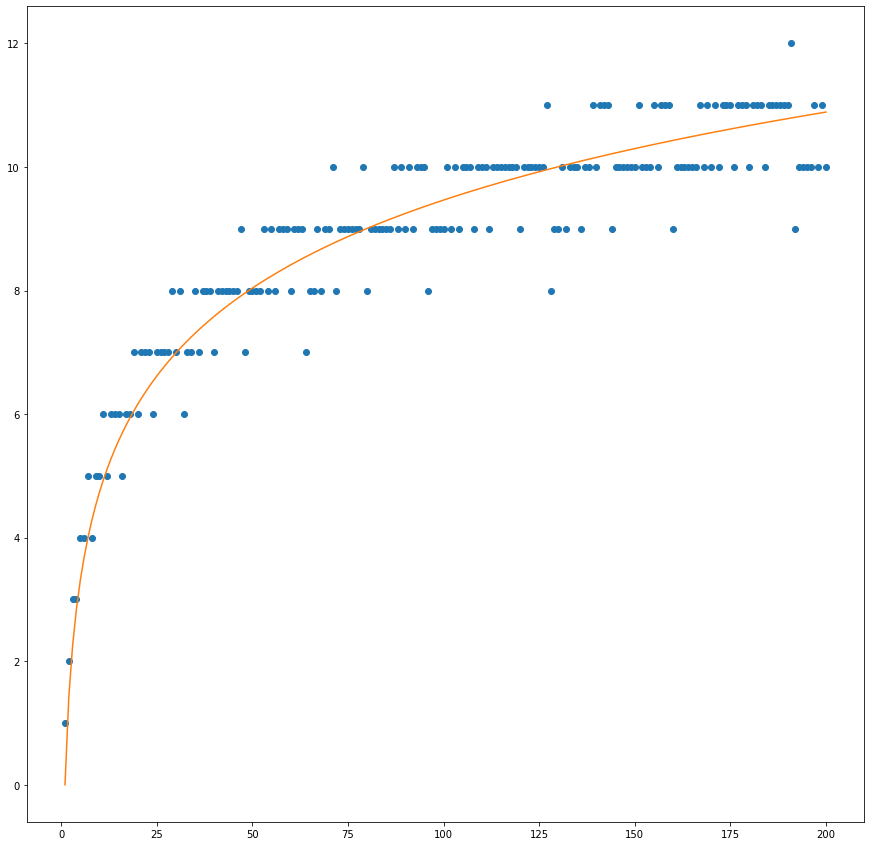

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import leastsq


def check_Brau():
    ls = []
    for i in range(1,201):
        res, t = find_star_chain_with_splitting_vector_alg(i)
        ls.append(len(res))
    return  ls


result_Brau = check_Brau()


def find_model(t, coeffs):
    return np.log(t)*coeffs[0]


def find_residuals(coeffs, y, t):
    return  y - find_model(t, coeffs)


def plot_graph():
    figure, axes = plt.subplots(figsize = (15,15))
    x, y = [i for i in range(1,201)], result_Brau
    t = np.arange(1, 201)
    res = np.array(result_Brau)
    p, flag = leastsq(find_residuals, 1, args=(res, t))
    plt.plot(t, res, 'o',  t, find_model(t, p))

    
plot_graph()

**Вывод:**

График напоминает график логарифма, что подтверждает теорему Брауэра. С увеличением $n$ ввиду логарифмического роста длина $l(n)$ будет не так сильно увеличиваться, поэтому $l(n)$ и $\lambda(n)$ будут эквивалентны на бесконечности.

**5. Проверка гипотезы Шольца-Брауэра**


In [24]:
#l*(2^n-1) <= l*(n) + n - 1

def find_left_right_parts_of_Sholtz_hypothesis():
    l_2s = []
    l_ns = []
    for i in range(2,11): #до 11
        left_part_of_hypothesis = find_star_chain_with_splitting_vector_alg((1 << i) - 1)
        right_part_of_hypothesis = find_star_chain_with_splitting_vector_alg(i)
        
        l_2s.append(len(left_part_of_hypothesis[0]))
        l_ns.append(len(right_part_of_hypothesis[0]) + i - 1)
        
    return [l_2s, l_ns]


results = find_left_right_parts_of_Sholtz_hypothesis()
print("lefts: ", results[0], "\trigths: ", results[1])

for m in range(0, len(results[0])):
    print(results[0][m], " <= ", results[1][m], "\tIt's ", results[0][m] <= results[1][m])


lefts:  [3, 5, 6, 8, 9, 11, 11, 13, 14] 	rigths:  [3, 5, 6, 8, 9, 11, 11, 13, 14]
3  <=  3 	It's  True
5  <=  5 	It's  True
6  <=  6 	It's  True
8  <=  8 	It's  True
9  <=  9 	It's  True
11  <=  11 	It's  True
11  <=  11 	It's  True
13  <=  13 	It's  True
14  <=  14 	It's  True


**Вывод:**

Действительно, гипотеза верна для чисел $n\leqslant10$. Эту гипотезу следует использовать при уверенности, что расхождение между величинами будет не велико. Она даст хороший выигрыш в производительности за счет того, что считать минимальную цепочку для чисел $2^{10}$ намного дольше чем для $10$, и для рассмотренного промежутка теперь для вычисления длины цепочки $l*(2^n-1)$ достаточно вычислить $l*(n)$+$n$-1.

## Выводы



Были рассмотрены: бинарный метод, метод множителей, алгоритм Брауэра, метод дробления векторов, первое следствие теоремы Брауэра и гипотеза Шольца-Брауэра.

Бинарный метод очень прост в реализации, но в-среднем он будет показывать результат чуть хуже, чем метод множителей.

Алгоритм Брауэра дает приемлимые длины аддитивных цепочек и требует не много вычислительных мощностей, в отличии от более правильного алгоритма дробления векторов, который показывает точную минимальную длину цепочки, но требует огромных ресурсов. 

Следствие 1 теоремы Брауэра было проверено и оно действительно верно.

Также была проверена гипотеза Шольца-Брауэра для чисел $n\leqslant10$. Можно воспользоваться этой гипотезой, чтобы не вычислять числа порядка $2^{10}$ схожим методом с алгоритмом дробления векторов.